### Checking for the output distribution of the labels 

Output distribution can provide us about the confidence of the black box on the new random dataset

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [4]:
import sys
sys.path.insert(0, '../utils/')
from generate_random import generate_random
sys.path.insert(0, '../Neural Nets/')
from black_box import blackBox

In [6]:
df = pd.read_csv('../data/heart.csv')
labels = pd.get_dummies(df.pop('chd'))`
df['famhist'] = df['famhist'].map({"Absent":0,"Present":1})
data = df.values
print data.shape
print labels.shape

(462, 9)
(462, 2)


In [7]:
labels = labels.values

In [5]:
## Constructing the WHITE BOX
## Defining the parameters
params = {}
params['batch_size'] = 100
params['learning_rate'] = 1e-4
params['n_epochs'] = 10
NUM_FEATURES = 9
NUM_CLASSES = 2
NUM_NEURONES = 1024

## Assembling the graph
print 'Assembling the graph....'
model = blackBox(params,"black_box")
image,label = model._create_placeholder(num_input=NUM_FEATURES,num_output=NUM_CLASSES,layer_name="placeholder_bb")
hidden_1 = model._create_hidden_layer(image,NUM_NEURONES,"hidden_1_bb")
hidden_2 = model._create_hidden_layer(hidden_1,NUM_NEURONES,"hidden_2_bb")
softmax = model._create_softmax(hidden_2,NUM_CLASSES,"softmax_bb")
model._create_loss(label,softmax,"loss_bb")
model._create_optimizer("optimizer_bb")
model._accuracy(label,softmax,"accuracy_bb")
model._create_summaries("summary_bb")

Assembling the graph....


In [8]:
print 'Training the model...'
model.train((data,labels),file_name="test")

Training the model...


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 1	Loss: 13.5138453245	Accuracy: 0.507500000298
Epoch: 2	Loss: 8.87897819281	Accuracy: 0.605000004172


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 3	Loss: 5.87000745535	Accuracy: 0.434999994934
Epoch: 4	Loss: 5.28006112576	Accuracy: 0.647500008345


100%|██████████| 4/4 [00:00<00:00, 33.76it/s]


Saving Checkpoint...


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 5	Loss: 3.84243559837	Accuracy: 0.562499985099
Epoch: 6	Loss: 3.06907945871	Accuracy: 0.642499998212


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 7	Loss: 3.09129542112	Accuracy: 0.622500002384
Epoch: 8	Loss: 2.73672753572	Accuracy: 0.644999995828


100%|██████████| 4/4 [00:00<00:00, 31.07it/s]


Epoch: 9	Loss: 2.64527398348	Accuracy: 0.66249999404
Saving Checkpoint...
Epoch: 10	Loss: 2.44994527102	Accuracy: 0.65000000596


In [9]:
data_size = 10000
random_dataset = generate_random(data_size)
print random_dataset.shape

(10000, 9)


In [11]:
proba = model.predict(random_dataset,file_name="test")
print proba.shape

Restoring checkpoint...
INFO:tensorflow:Restoring parameters from ../checkpoints/test/test
(10000, 2)


[]

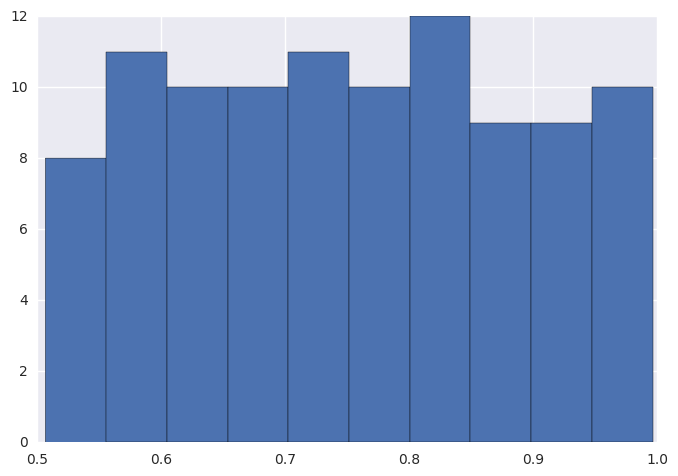

In [21]:
plt.hist(np.max(proba[0:100,:],1))
plt.plot()

### ~60 percent of probabilities are less than 80 percent. This means that around 60 percent of the time the black box was not confidence more than 80 percent.

In [50]:
sample = random_dataset.iloc[0:100,:]
sample = sample[np.max(proba[0:100],1) > 0.80]
print sample.shape

(40, 9)


In [51]:
orig = data[np.argmax(labels,1) == 1,:]
print orig.shape

(160, 9)


In [52]:
x = np.sum(np.square(orig[0:40,:] - sample),1).values
print 'Mean Square Root Distance: ',np.mean(np.sqrt(x))

Mean Square Root Distance:  136.139297414


In [53]:
sample = random_dataset.iloc[0:100,:]
sample = sample[(np.max(proba[0:100],1) < 0.80) & (np.max(proba[0:100],1) >= 0.50)]
print sample.shape

(60, 9)


In [54]:
x = np.sum(np.square(orig[0:60,:] - sample),1).values
print 'Mean Square Root Distance: ',np.mean(np.sqrt(x))

Mean Square Root Distance:  125.393887684
